In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate

In [2]:
from download_data import download_data
from adaboost import AdaBoost

In [3]:
data, target = download_data()
data.shape, target.shape

((958, 9), (958,))

In [4]:
results = list()

for iterations in tqdm([1, 2, 3, 4, 7, 10, 20, 30, 50, 80, 150, 300]):
    model = cross_validate(
        estimator=AdaBoost(iterations=iterations),
        X=data, y=target,
        cv=5, n_jobs=5, scoring='accuracy'
    )

    results.append({
        'iterations': iterations,
        'fit_time': np.mean(model['fit_time']),
        'accuracy': np.mean(model['test_score']),
    })

100%|██████████| 12/12 [00:13<00:00,  1.15s/it]


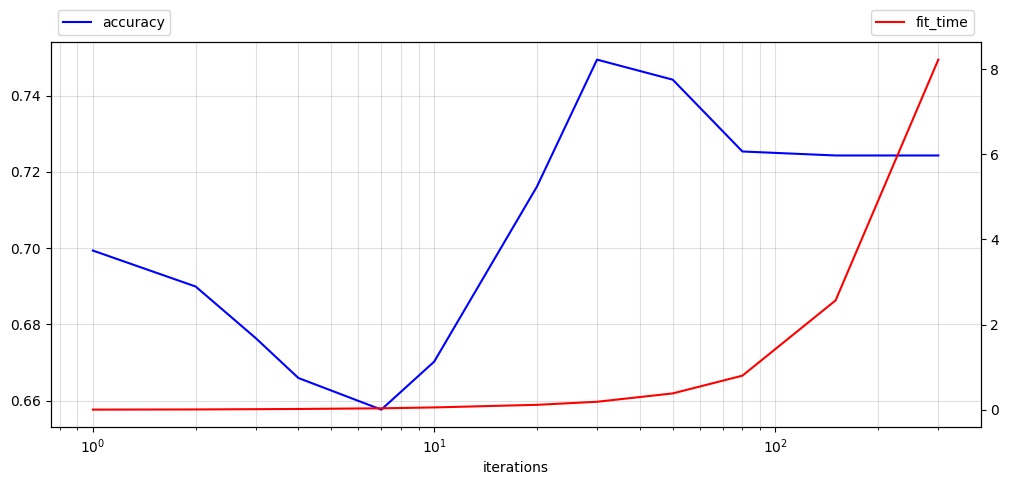

In [5]:
df = pd.DataFrame(results)
plt.figure(figsize=(12, 5))

ax = plt.gca()
df.plot(x='iterations', y='accuracy', color='blue', ax=ax)
axt = ax.twinx()
df.plot(x='iterations', y='fit_time', color='red', ax=axt)

ax.set_xscale('log')
ax.grid(True, axis='both', which='both', alpha=.4)

ax.legend(loc='lower left', bbox_to_anchor=(0, 1))
axt.legend(loc='lower right', bbox_to_anchor=(1, 1))

plt.show()
plt.close()

In [6]:
accuracies = AdaBoost(iterations=300).fit(data, target).iter_acc_

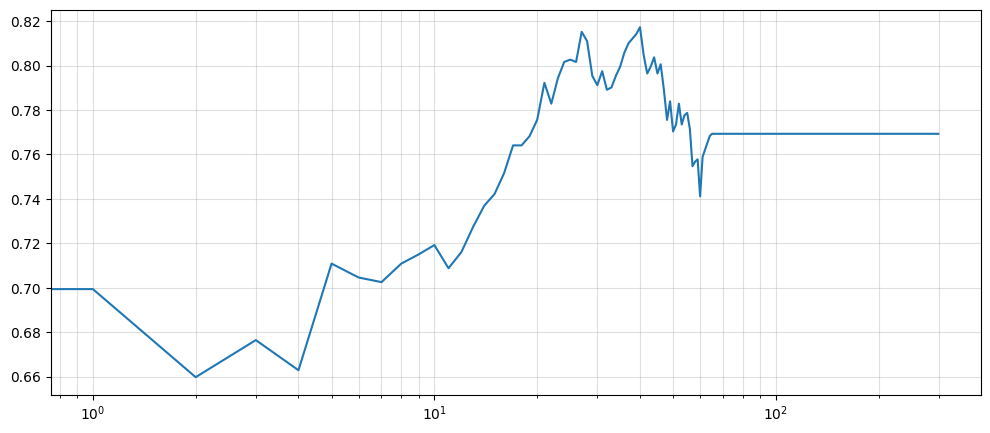

In [7]:
plt.figure(figsize=(12, 5))
plt.plot(accuracies)
plt.xscale('log')
plt.grid(True, axis='both', which='both', alpha=.4)
plt.show()
plt.close()

---